# Redes Neuronales

In [4]:
pip install optuna

     |████████████████████████████████| 235kB 3.5MB/s 
     |████████████████████████████████| 1.1MB 11.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 112kB 22.9MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 133kB 17.4MB/s 
  Created wheel for alembic: filename=alembic-1.4.2-cp36-none-any.whl size=159543 sha256=f2a26a3ddaef46e7f4aea950a0b4c7189cf8e4d8378c582cf369cbf0da8b5723
  Stored in directory: /root/.cache/pip/wheels/1f/04/83/76023f7a4c14688c0b5c2682a96392cfdd3ee4449eaaa287ef
Successfully built alembic
  Created wheel for optuna: filename=optuna-2.0.0-cp36-none-any.whl size=312964 sha256=842984a38505fdc155df536d3f2c684dea1f30fa313649e132145864175b48e5
  Stored in directory: /root/.cache/pip/wheels/b5

In [1]:
import pandas as pd

def get_mpg_data():
    data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                    header=None,sep='\s+')
    return data

data=get_mpg_data()

https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)



In [2]:
data.rename(columns={0:'mpg',1:'cylinders',2:'displacement',3:'horsepower',4:'weight',
             5:'acceleration',6:'model_year',7:'origin',8:'car_name'},inplace=True)

In [3]:
data['car_name'] = data['car_name'].astype('category')
data['horsepower'] = data['horsepower'].astype('float',errors='ignore')
data['horsepower'] = pd.to_numeric(data['horsepower'],errors='coerce')
data['model_year'] = data['model_year'].astype('category')
data['origin'] = data['origin'].astype('category')

In [4]:
data.drop('car_name',inplace=True,axis=1)

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


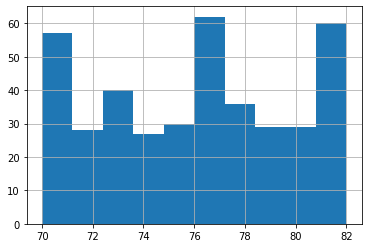

In [6]:
data['model_year'].hist()

In [7]:
data['year_range']=pd.cut(data['model_year'], bins=3)

In [8]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,year_range
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"(69.988, 74.0]"
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"(69.988, 74.0]"
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"(69.988, 74.0]"
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"(69.988, 74.0]"
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"(69.988, 74.0]"


In [9]:
data['year_range']

0      (69.988, 74.0]
1      (69.988, 74.0]
2      (69.988, 74.0]
3      (69.988, 74.0]
4      (69.988, 74.0]
            ...      
393      (78.0, 82.0]
394      (78.0, 82.0]
395      (78.0, 82.0]
396      (78.0, 82.0]
397      (78.0, 82.0]
Name: year_range, Length: 398, dtype: category
Categories (3, interval[float64]): [(69.988, 74.0] < (74.0, 78.0] < (78.0, 82.0]]

In [10]:
data.drop(columns={'model_year'},axis=1,inplace=True)

In [11]:
reg_data=pd.get_dummies(data).copy()
reg_data.dropna(axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


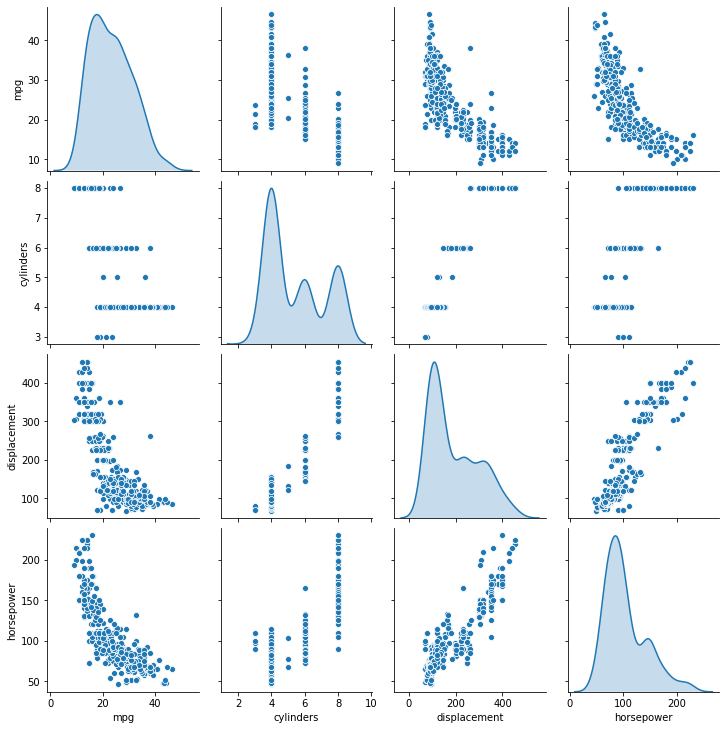

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[["mpg", "cylinders", "displacement", "horsepower"]], diag_kind="kde")

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y=reg_data.pop('mpg').values
X=scaler.fit_transform(reg_data.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X.shape

(392, 11)

# Red Neuronal Simple

In [17]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print('Tensorflow Version : ',tf.__version__)

def build_model(input_dim,learning_rate=0.001):
    model = keras.Sequential([
        layers.Dense(8,activation='relu', input_shape=[input_dim]),
        layers.Dense(8,activation='relu'),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

Tensorflow Version :  2.3.0


In [15]:
!nvidia-smi

Sat Aug 22 15:03:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
model = build_model(X.shape[1])

print("[INFO] training model...")
history=model.fit(x=X_train, y=y_train, validation_split=0.2,epochs=100,shuffle=True, batch_size=32,verbose=0)
print("[DONE] training model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training model...
[DONE] training model...


In [22]:
X.shape[0]//32

12

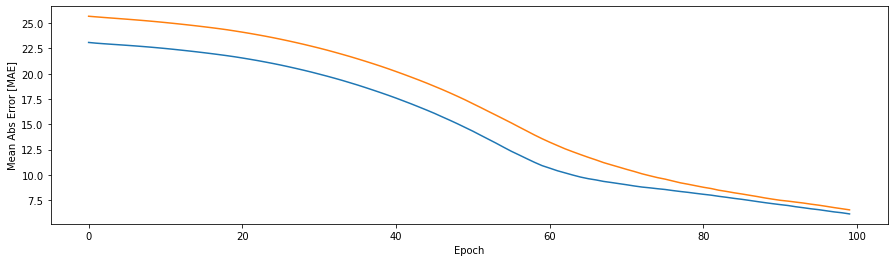

In [27]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MAE]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')

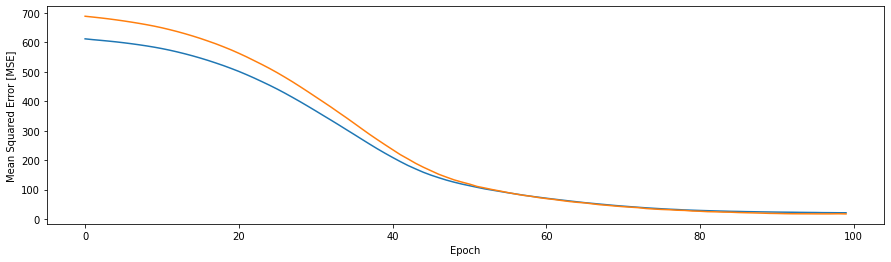

In [25]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error [MSE]')
plt.plot(hist['epoch'], hist['mse'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')

r^2 on test data : 0.124646


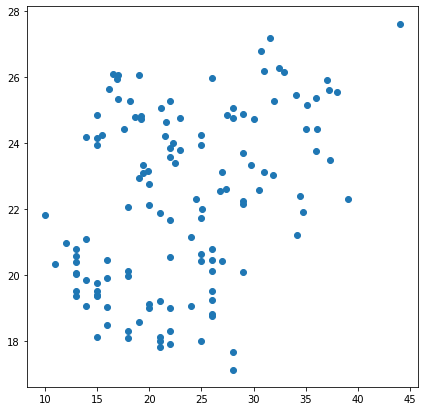

In [28]:
from sklearn.metrics import r2_score

y_hat=model.predict(X_test)
r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

# Red Neuronal Regularizacion

In [30]:
def build_regularized_model(input_dim,learning_rate=0.001,l1=1e-5,l2=1e-4):
    model = keras.Sequential([
        layers.Dense(64,activation='relu', input_shape=[input_dim]),
        layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2),),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [32]:
model = build_regularized_model(X.shape[1],l2=1e-1,l1=1e-2)
print("[INFO] training regularized model...")
history=model.fit(x=X_train, y=y_train, validation_split=0.2,epochs=100, batch_size=32,verbose=0)
print("[DONE] training regularized model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training regularized model...
[DONE] training regularized model...


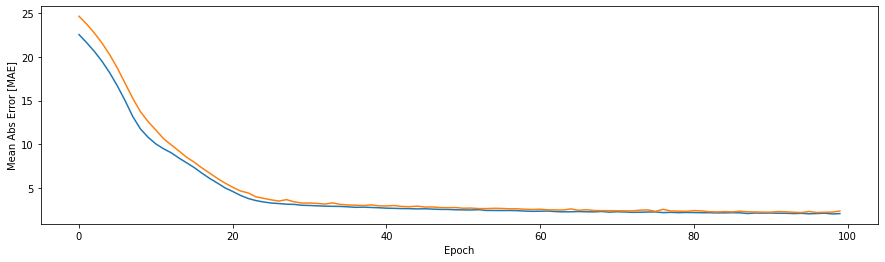

In [33]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MAE]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')

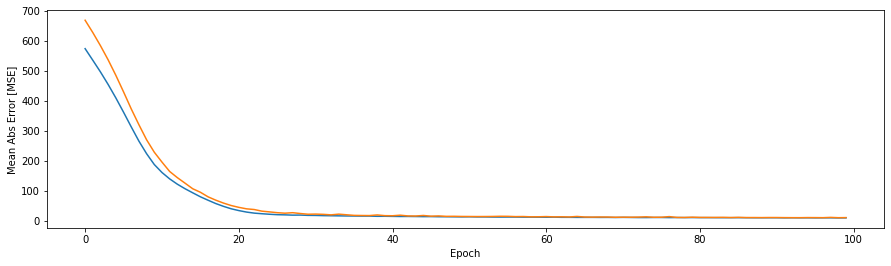

In [34]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MSE]')
plt.plot(hist['epoch'], hist['mse'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')

r^2 on test data : 0.817787


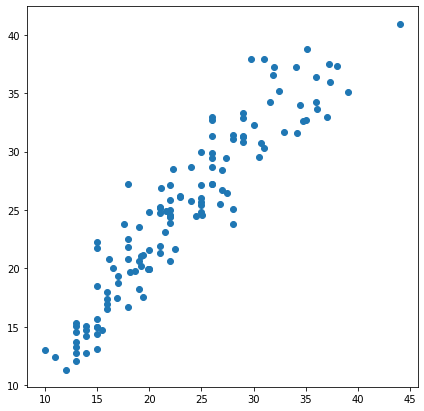

In [35]:
y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

In [45]:
def build_complex_model(input_dim,learning_rate=0.001):
    model = keras.Sequential([
        layers.Dense(1024,activation='relu', input_shape=[input_dim]),
        layers.Dense(1024,activation='relu'),
        layers.Dense(1024,activation='relu'),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [47]:
model = build_complex_model(X.shape[1])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              12288     
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 2,112,513
Trainable params: 2,112,513
Non-trainable params: 0
_________________________________________________________________


In [49]:
print("[INFO] training complex model...")
history=model.fit(x=X_train, y=y_train, validation_split=0.2,epochs=100, batch_size=32,verbose=0)
print("[DONE] training complex model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training complex model...
[DONE] training complex model...


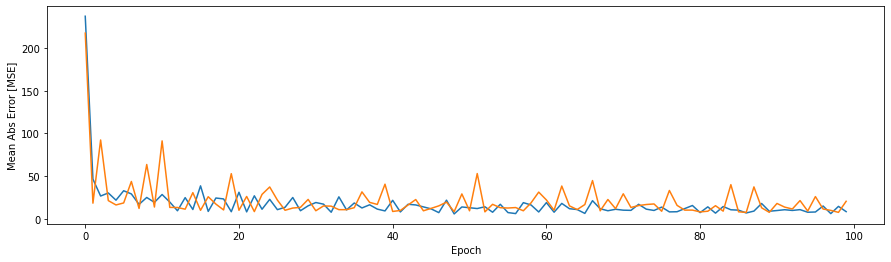

In [50]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MSE]')
plt.plot(hist['epoch'], hist['mse'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')

r^2 on test data : 0.761301


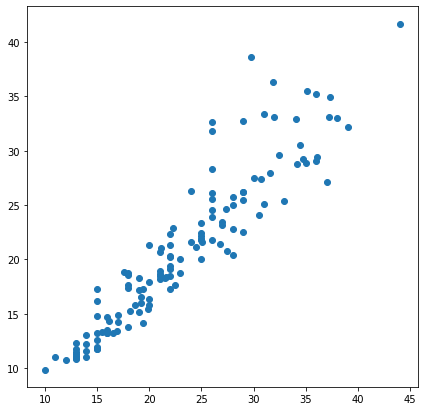

In [51]:
y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

# Auto Keras

In [52]:
from keras.backend import clear_session
from keras.models import Sequential
from keras.optimizers import RMSprop
import optuna

def objective(trial):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    l1=trial.suggest_float("l1", 1e-5, 1e-1, log=True)
    l2=trial.suggest_float("l2", 1e-4, 1e-1, log=True)
    num_input = trial.suggest_int("n_input", 4, 128, log=True)
    num_hidden = trial.suggest_int("n_hidden", 4, 128, log=True)
    model = Sequential()
    input_dim=X_train.shape[1]
    model.add(layers.Dense(num_input,activation='relu',input_shape=[input_dim]))
    model.add(layers.Dense(num_hidden,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
    model.add(layers.Dense(1,activation='linear'))
    # We compile our model with a sampled learning rate.
    lr = trial.suggest_float("lr", 1e-4, 1e-1, log=True)
    model.compile(
        loss="mse", optimizer=RMSprop(lr=lr), metrics=['mae', 'mse']
    )
    model.fit(
        X_train,
        y_train,
        validation_split=0.2,
        epochs=20,
        shuffle=True,
        batch_size=32,
        verbose=False,
        use_multiprocessing=True,
    )
    # Evaluate the model accuracy on the validation set.
    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]



In [60]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

[I 2020-08-22 15:56:08,613] Trial 0 finished with value: 3.2507033348083496 and parameters: {'l1': 6.4158881785259e-05, 'l2': 0.0003896833311731326, 'n_input': 53, 'n_hidden': 63, 'lr': 0.0017843778167519048}. Best is trial 0 with value: 3.2507033348083496.
[I 2020-08-22 15:56:10,573] Trial 1 finished with value: 20.707439422607422 and parameters: {'l1': 0.0020323017097501656, 'l2': 0.00016724787541896153, 'n_input': 4, 'n_hidden': 7, 'lr': 0.0017957892201669267}. Best is trial 0 with value: 3.2507033348083496.
[I 2020-08-22 15:56:12,417] Trial 2 finished with value: 12.498123168945312 and parameters: {'l1': 0.000400351962373496, 'l2': 0.00023233587801634685, 'n_input': 128, 'n_hidden': 30, 'lr': 0.00047244654889918165}. Best is trial 0 with value: 3.2507033348083496.
[I 2020-08-22 15:56:14,281] Trial 3 finished with value: 17.161962509155273 and parameters: {'l1': 0.07191196554696364, 'l2': 0.010519748118186928, 'n_input': 37, 'n_hidden': 5, 'lr': 0.0006816612518502685}. Best is trial

Number of finished trials: 100
Best trial:
  Value: 2.021672487258911


In [62]:
optuna.visualization.plot_contour(study, params=['l1', 'l2'])

In [63]:
optuna.visualization.plot_contour(study, params=['n_input', 'n_hidden'])

In [56]:
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

    l1: 3.1059811058252855e-05
    l2: 0.0049041122455272335
    n_input: 10
    n_hidden: 20
    lr: 0.027598814373498804


In [61]:
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

    l1: 0.008244414779487414
    l2: 0.001079746719476183
    n_input: 4
    n_hidden: 28
    lr: 0.03822283039652684


In [64]:
def build_auto_model(params):
  clear_session()
  model = Sequential()
  input_dim=X_train.shape[1]
  model.add(layers.Dense(params['n_input'],activation='relu',input_shape=[input_dim]))
  model.add(layers.Dense(params['n_hidden'],activation='relu',
                         kernel_regularizer=regularizers.l1_l2(l1=params['l1'], l2=params['l2'])))
  model.add(layers.Dense(1,activation='linear'))
  lr = params['lr']
  model.compile(loss="mse", optimizer=RMSprop(lr=lr), metrics=['mae', 'mse'])
  return model

model=build_auto_model(study.best_params)
print("[INFO] training auto model...")
history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
                  use_multiprocessing=True,epochs=200, batch_size=32,verbose=0)
print("[DONE] training auto model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


[INFO] training auto model...
[DONE] training auto model...


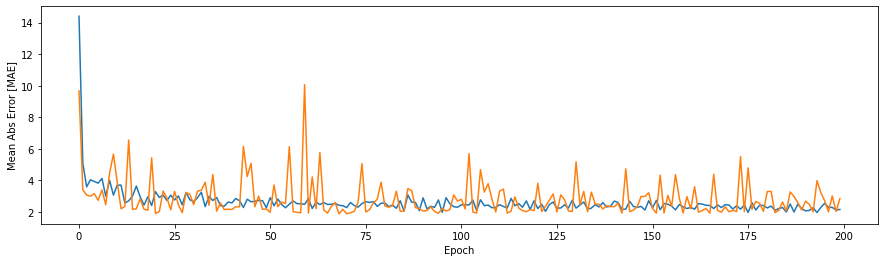

In [65]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MAE]')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')

r^2 on test data : 0.771977


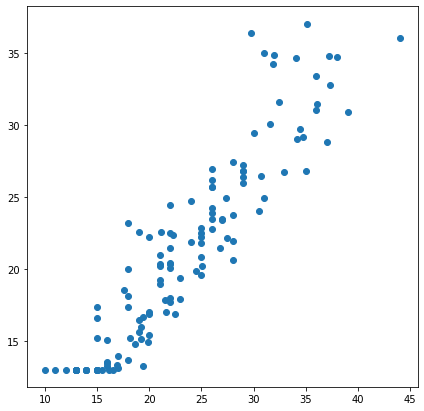

In [66]:
y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir el total de 'nuevos casos por millon de habitantes' a partir de las caracteristicas del pais (edad de la problacion, ingreso per capita, etc).
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo regularizacion.


In [70]:
# Analisis Exploratorio de Casos COVID 

def get_owid_data(download):
    if download:
        data=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
        data.to_csv('covid_owid_data.csv')
    else:
        data=pd.read_csv('covid_owid_data.csv')
    return data

data=get_owid_data(True)

In [77]:
grouped_data=data.groupby(['location']).median()
grouped_data.sort_values(by=['new_cases_smoothed_per_million'],inplace=True,ascending=False)

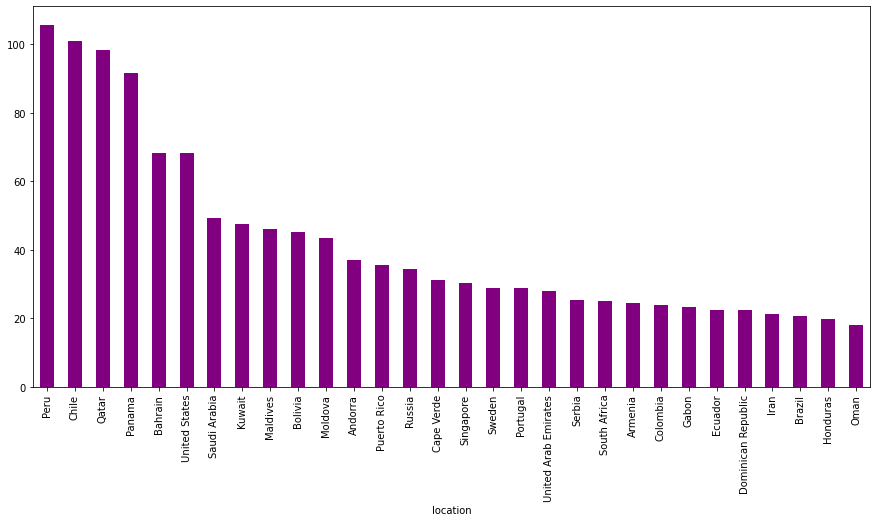

In [78]:
plt.figure(figsize=(15,7))
grouped_data['new_cases_smoothed_per_million'].head(30).plot(kind="bar", color='purple')

In [73]:
grouped_data.dtypes

total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_rate                      float64
stringency_index                   float64
population                         float64
population_density                 float64
median_age 

In [79]:
cols=['stringency_index','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita',
      'extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers',
      'handwashing_facilities','hospital_beds_per_thousand','life_expectancy']
dep='new_cases_smoothed_per_million'

In [109]:
grouped_data.fillna(method='ffill',inplace=True)

In [112]:
grouped_data.fillna(method='bfill',inplace=True)

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
X=scaler.fit_transform(grouped_data[cols].values)
y=np.log1p(grouped_data[dep].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [176]:
def build_regularized_model(input_dim,learning_rate=0.001,l1=1e-1,l2=1e-1):
    model = keras.Sequential([
        layers.Dense(8,activation='relu', input_shape=[input_dim]),
        layers.Dense(8,activation='relu'),
        layers.Dense(8,activation='relu'),
        layers.Dense(1,activation='linear')
      ])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [177]:
model = build_regularized_model(X.shape[1])
print("[INFO] training covid model...")
history=model.fit(x=X_train, y=y_train, validation_split=0.1,epochs=100, batch_size=32,verbose=0)
print("[DONE] training covid model...")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[INFO] training covid model...
[DONE] training covid model...


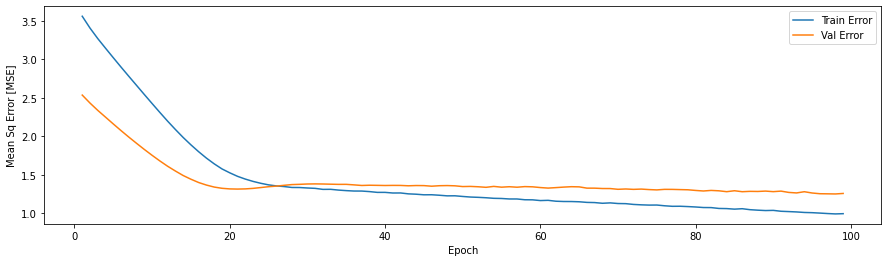

In [178]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Sq Error [MSE]')
plt.plot(hist['epoch'][1:], hist['mse'][1:],label='Train Error')
plt.plot(hist['epoch'][1:], hist['val_mse'][1:],label = 'Val Error')
plt.legend()

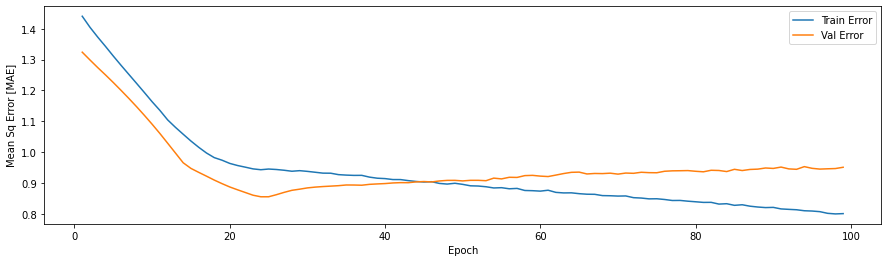

In [179]:
plt.figure(figsize=(15,4))
plt.xlabel('Epoch')
plt.ylabel('Mean Sq Error [MAE]')
plt.plot(hist['epoch'][1:], hist['mae'][1:],label='Train Error')
plt.plot(hist['epoch'][1:], hist['val_mae'][1:],label = 'Val Error')
plt.legend()

r^2 on test data : 0.203878


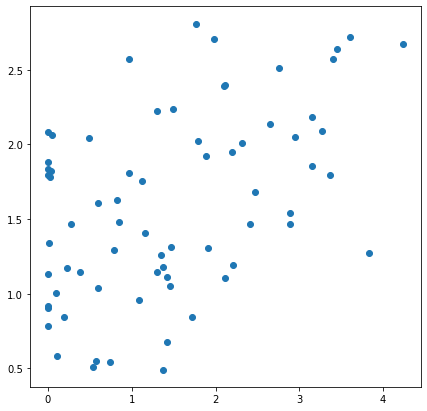

In [180]:
y_hat=model.predict(X_test)

r2 = r2_score(y_test, y_hat.reshape(-1))
print("r^2 on test data : %f" % r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_hat.reshape(-1))